#### **Import appropriate libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

#### **Data preparation, Exploration and Preprocessing**

In [4]:
df = pd.read_csv("concrete compressive strength C.csv")

In [5]:
df.head()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_Category,Contains_Fly_Ash,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,Coarse,False,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,Coarse,False,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,Coarse,False,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,Coarse,False,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,Fine,False,44.30


In [6]:
df.shape

(1030, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age_(day)                      1030 non-null   int64  
 8   Concrete_Category              1030 non-null   object 
 9   Contains_Fly_Ash               1030 non-null   bool   
 10  Concrete_compressive_strength  1030 non-null   float64
dtypes: bool(1), float64(8), int64(1), object(1)
memory usage: 81.6+ KB


In [8]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.describe(include = 'all')

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_Category,Contains_Fly_Ash,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030,1030,1030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coarse,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,566,NaN
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,NaN,NaN,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,NaN,NaN,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,NaN,NaN,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,NaN,NaN,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,NaN,NaN,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,NaN,NaN,46.135000


In [10]:
df.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age_(day)                        0
Concrete_Category                0
Contains_Fly_Ash                 0
Concrete_compressive_strength    0
dtype: int64

In [11]:
df.Concrete_Category.unique()

array(['Coarse', 'Fine'], dtype=object)

##### **Encoding the target column**

In [13]:
df['Concrete_Category'] = df['Concrete_Category'].map({'Coarse':0, 'Fine':1})

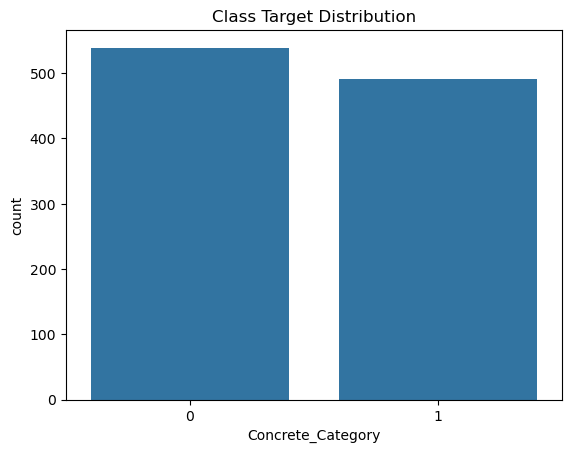

In [14]:
sns.countplot(data=df, x='Concrete_Category') 
plt.title("Class Target Distribution")
plt.show()

##### **Separate the target (class) feature from the input features**

In [16]:
X = df.drop('Concrete_Category', axis=1) #input features
y = df['Concrete_Category'] #target feature

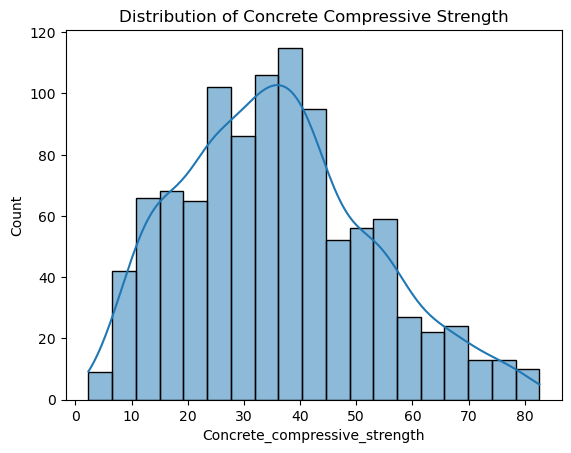

In [17]:
#Distribution of cement 

sns.histplot(df['Concrete_compressive_strength'], kde=True)
plt.title('Distribution of Concrete Compressive Strength') 
plt.show()

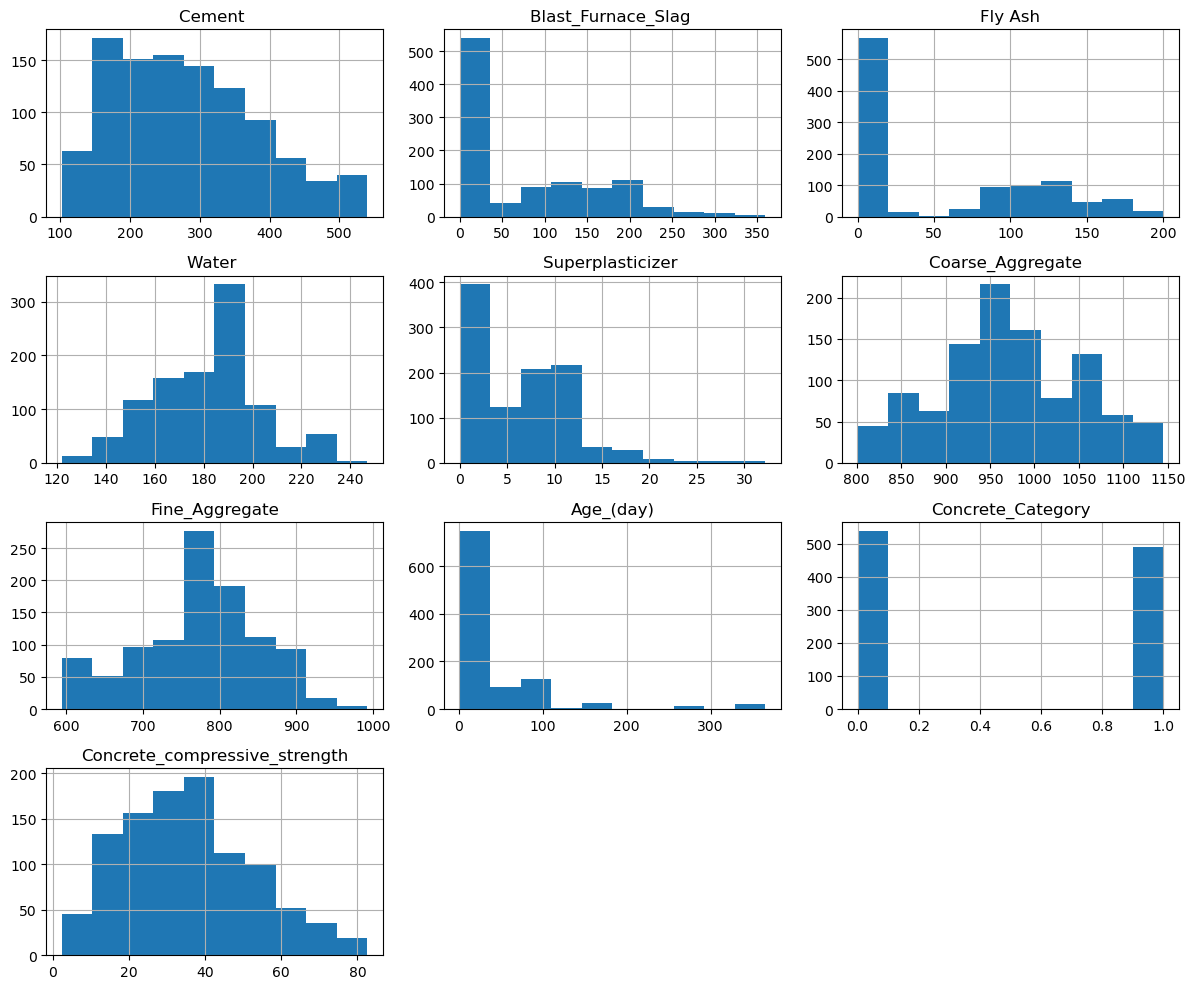

In [18]:
#Distribution of all 
df.hist(figsize=(12,10)) 
plt.tight_layout()
plt.show() 

In [19]:
#function to remove outliers based on IQR
selected_features = df[['Cement ', 'Blast_Furnace_Slag ', 'Fly Ash', 'Water ', 'Superplasticizer ', 'Coarse_Aggregate  ', 'Fine_Aggregate', 'Age_(day)', 'Concrete_compressive_strength']]
df_filtered = selected_features.copy() 

#Calculating the first and third quartiles
Q1 = df_filtered.quantile(0.25) 
Q3 = df_filtered.quantile(0.75)

#Calculate the IQR range 
IQR = Q3 - Q1

#Setting the lower and upper bound using the IQR method
lower_bound_iqr = Q1 - 1.5 * IQR 
upper_bound_iqr = Q3 + 1.5 * IQR

#making a new dataframe for IQR
df_iqr_filtered = df_filtered[(df_filtered >= lower_bound_iqr) & (df_filtered <= upper_bound_iqr)].dropna() 

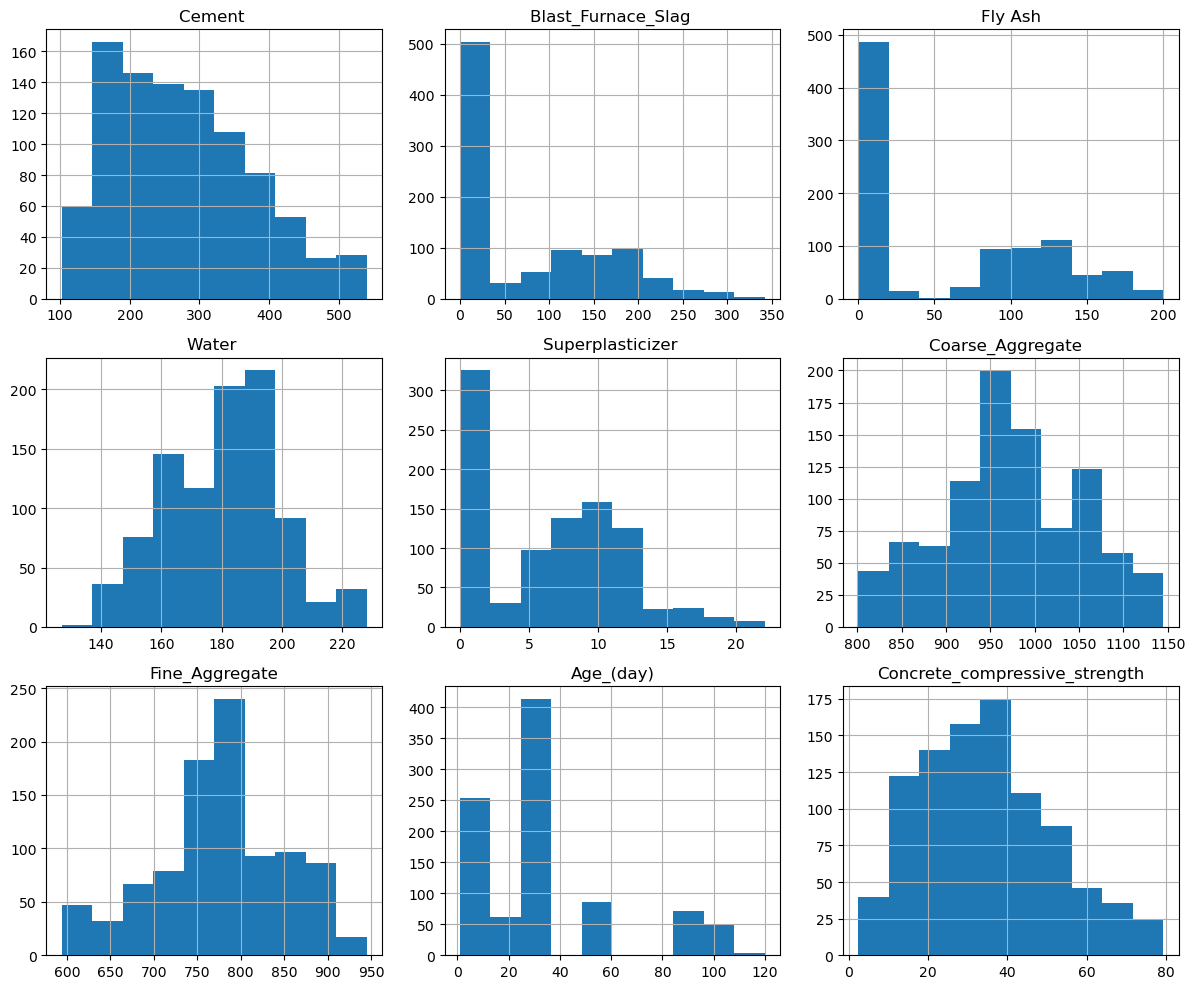

In [20]:
#Distribution of all 
df_iqr_filtered.hist(figsize=(12,10)) 
plt.tight_layout()
plt.show() 

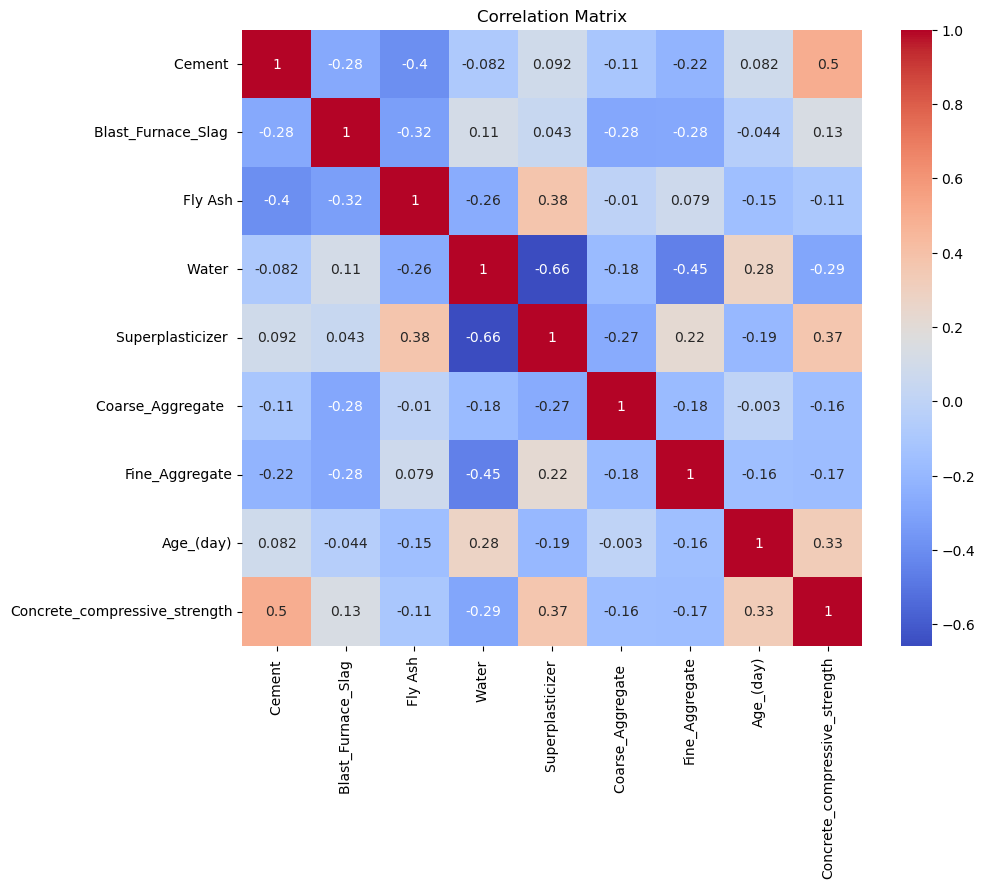

In [21]:
#Coreelation matrix heatmap for numerical features 
plt.figure(figsize = (10,8))
correlation_matrix = df[['Cement ','Blast_Furnace_Slag ','Fly Ash','Water ','Superplasticizer ','Coarse_Aggregate  ','Fine_Aggregate','Age_(day)','Concrete_compressive_strength']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

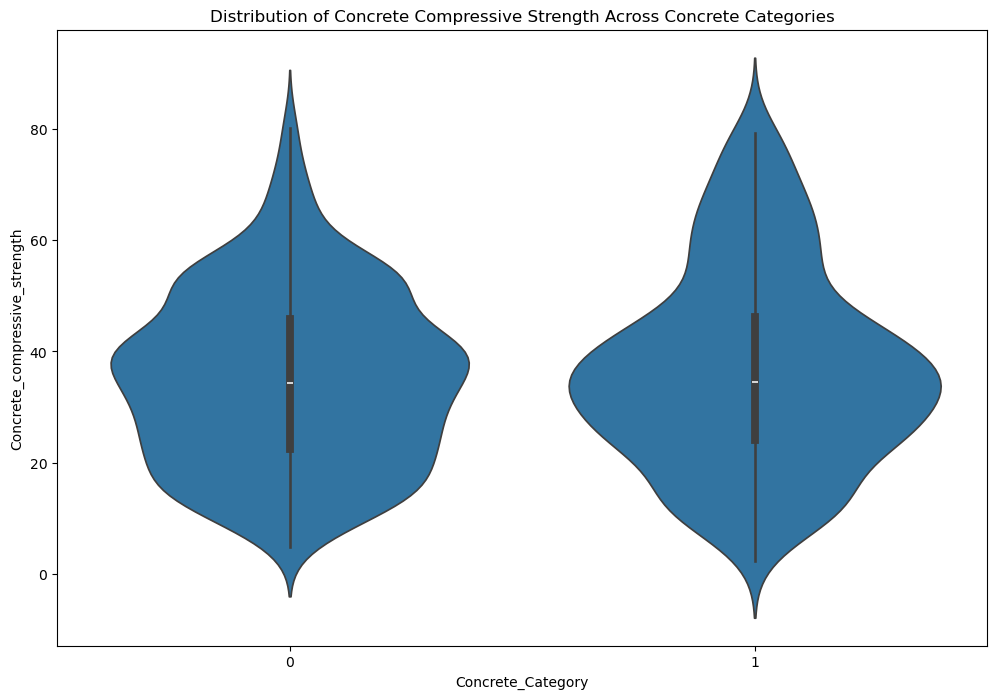

In [22]:
#Violin plot to compare the distribution of a numerical feature across different classes
plt.figure(figsize=(12,8))
sns.violinplot(x='Concrete_Category', y='Concrete_compressive_strength', data=df)
plt.title('Distribution of Concrete Compressive Strength Across Concrete Categories') 
plt.show() 

##### **Split data into train and test sets**

In [24]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y) 

 ##### **Normalize the data**

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

##### **Building neural network using keras**

In [28]:
import tensorflow as tf 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, activation='relu',input_shape=(10,))) 
model.add(tf.keras.layers.Dense(6, activation='softmax')) 

2024-12-03 17:27:49.802804: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
df['Concrete_Category'].value_counts()

Concrete_Category
0    539
1    491
Name: count, dtype: int64

In [32]:
df['Concrete_Category'].value_counts().sum()

1030

In [33]:
#'Coarse': 0 52.3%
#'Fine': 1 47.7%

class_weights = {0:0.95, 1:1.05}

ConcreteCategory = model.fit(X_train, np.asarray(y_train), batch_size = 32, epochs=100, verbose=2, class_weight=class_weights, validation_split=0.2)

Epoch 1/100
16/16 - 1s - 57ms/step - accuracy: 0.2247 - loss: 1.8392 - val_accuracy: 0.2500 - val_loss: 1.7329
Epoch 2/100
16/16 - 0s - 4ms/step - accuracy: 0.2935 - loss: 1.6973 - val_accuracy: 0.3226 - val_loss: 1.6034
Epoch 3/100
16/16 - 0s - 4ms/step - accuracy: 0.3806 - loss: 1.5682 - val_accuracy: 0.3952 - val_loss: 1.4861
Epoch 4/100
16/16 - 0s - 4ms/step - accuracy: 0.4555 - loss: 1.4528 - val_accuracy: 0.5403 - val_loss: 1.3803
Epoch 5/100
16/16 - 0s - 4ms/step - accuracy: 0.5607 - loss: 1.3461 - val_accuracy: 0.6129 - val_loss: 1.2820
Epoch 6/100
16/16 - 0s - 9ms/step - accuracy: 0.6437 - loss: 1.2486 - val_accuracy: 0.6694 - val_loss: 1.1936
Epoch 7/100
16/16 - 0s - 4ms/step - accuracy: 0.7045 - loss: 1.1608 - val_accuracy: 0.7097 - val_loss: 1.1121
Epoch 8/100
16/16 - 0s - 5ms/step - accuracy: 0.7510 - loss: 1.0789 - val_accuracy: 0.7419 - val_loss: 1.0361
Epoch 9/100
16/16 - 0s - 4ms/step - accuracy: 0.7935 - loss: 1.0047 - val_accuracy: 0.7661 - val_loss: 0.9645
Epoch 10/

##### **Evaluating Neural Model**

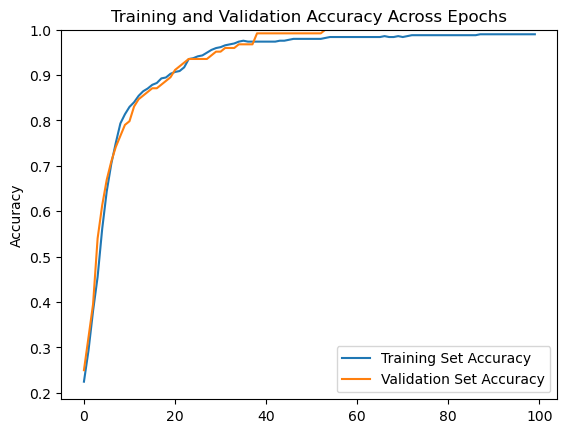

In [35]:
accuracy = ConcreteCategory.history['accuracy'] 
validation_accuracy = ConcreteCategory.history['val_accuracy'] 
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

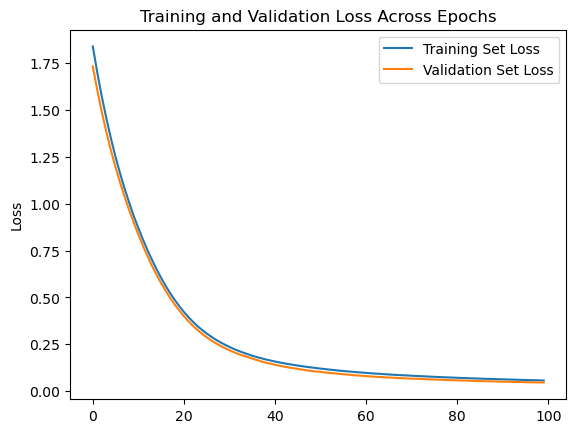

In [36]:
loss = ConcreteCategory.history['loss']
validation_loss = ConcreteCategory.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


#### **Import more libraries**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

In [40]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

print(classification_report(y_test,y_pred))

Accuracy Score: 99.27%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       216
           1       0.99      0.99      0.99       196

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



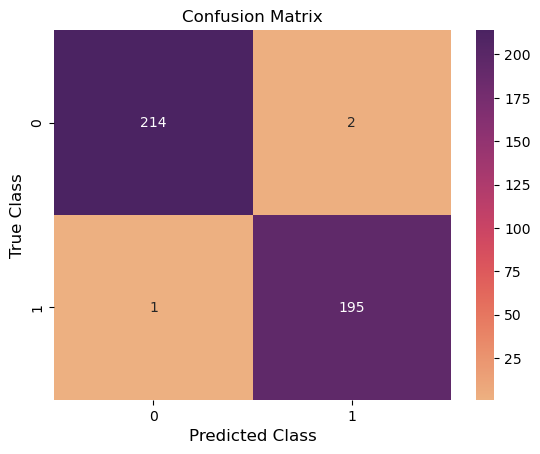

In [41]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

#### Variance threshold to remove low or no variance features

In [43]:
from sklearn.feature_selection import VarianceThreshold

variance_selector = VarianceThreshold(threshold=0)

X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)

print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 10 features remain


In [44]:
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [45]:
rf = RandomForestClassifier(random_state=42)

# Use RandomForestClassifier as the base model

rfecv = RFECV(rf, cv=2, step=2)
X_train_fs = rfecv.fit_transform(X_train_fs, y_train)
X_test_fs = rfecv.transform(X_test_fs)

print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 4


##### **Training and evaluating the model using Random Forest** 

In [47]:
rf_selectedfeatures = RandomForestClassifier()
rf_selectedfeatures.fit(X_train_fs, y_train)

RandomForestClassifier()

##### **Make predictions on the test data** 

In [49]:
y_pred = rf_selectedfeatures.predict(X_test_fs)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Score: 99.51%


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       216
           1       0.99      1.00      0.99       196

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



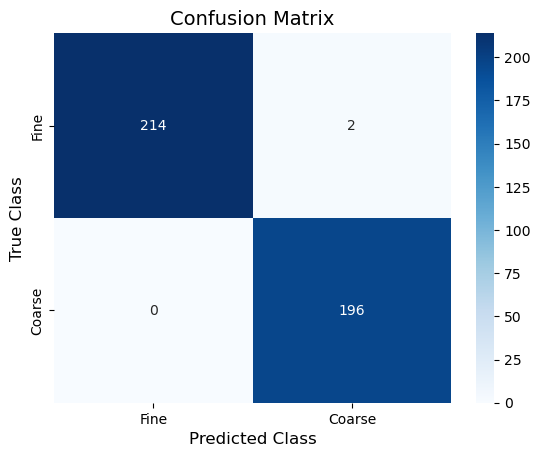

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = ['Fine', 'Coarse']
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()